In [1]:
#importing all the dependecies needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
import datetime as dt

In [2]:
data = pd.read_csv("train.csv")
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [3]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
#check if there is any duplicated rows
data.duplicated().any()

False

In [7]:
# As we can see there are two columns with missing values.
# So we do cleaning
#if the missing value are less than 5% we can drop the rows of the missing values
#to calculate the percentage of the values missing
per = data.isnull().sum() * 100/len(data)
print(per)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


In [8]:
# Now we use different method like mean and median to fill out the missing values;
data["Item_Weight_mean"] =data["Item_Weight"].fillna(data["Item_Weight"].mean())

data["Item_Weight_median"] =data["Item_Weight"].fillna(data["Item_Weight"].median())

In [9]:
#checking variance before and after inputing the mean and median and it ahould be always closer to the original variance

print("original weight variance", data["Item_Weight"].var())
print("mean weight  variance", data["Item_Weight_mean"].var())
print("median weight variance", data["Item_Weight_median"].var())

original weight variance 21.561688259836558
mean weight  variance 17.86012173506058
median weight variance 17.869561454073647


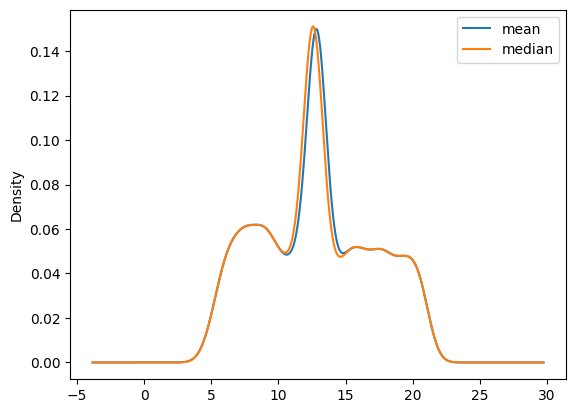

In [10]:
data["Item_Weight_mean"].plot(kind = "kde" , label = "mean")
data["Item_Weight_median"].plot(kind = "kde" , label = "median")
plt.legend()
plt.show()


In [11]:
# From the plot above, it is very clear that filling with mean or median will alter our original dataset since most of the dataset were clustered in the middle due to the mean or median used
#We will try another method in filling the missing values.
#checking if linear interpolation can be used to fill the missing values
#USING LINEAR INTERPOLATION#
data["Item_Weight_interpolate"] =data["Item_Weight"].interpolate(method = "linear")



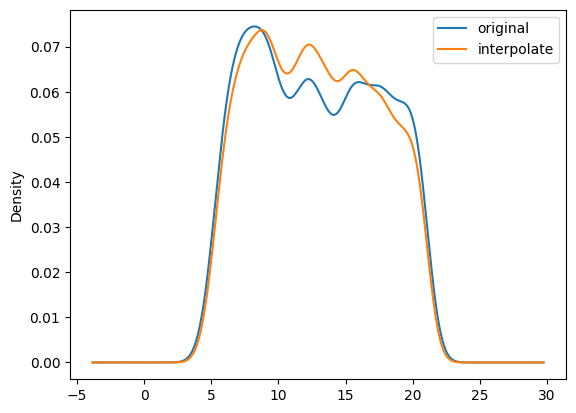

In [12]:
data["Item_Weight"].plot(kind="kde", label = "original")

data["Item_Weight_interpolate"].plot(kind="kde", label = "interpolate")


plt.legend()
plt.show()

In [13]:
# From the plots the distribution are close and better than the mean and median.We will also try another method from the bivariate method to know if we can use it to fill the missing values
#replacing the missing values
#using linear interpolation to replace the values in "item weight"
data["Item_Weight"].fillna(data["Item_Weight"].interpolate(method = "linear"), inplace = True)



In [14]:
data.sample(10)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mean,Item_Weight_median,Item_Weight_interpolate
1561,DRK49,14.150000,Low Fat,0.035944,Soft Drinks,40.5138,OUT046,1997,Small,Tier 1,Supermarket Type1,446.7518,14.150000,14.150,14.150000
131,NCH54,13.500000,Low Fat,0.072669,Household,160.2920,OUT046,1997,Small,Tier 1,Supermarket Type1,1438.1280,13.500000,13.500,13.500000
4736,FDP21,9.607500,Regular,0.045069,Snack Foods,190.8872,OUT019,1985,Small,Tier 1,Grocery Store,945.4360,12.857645,12.600,9.607500
7869,NCY18,7.285000,Low Fat,0.031279,Household,176.0054,OUT018,2009,Medium,Tier 3,Supermarket Type2,2626.5810,7.285000,7.285,7.285000
694,FDC33,15.766667,Regular,0.068605,Fruits and Vegetables,197.3768,OUT027,1985,Medium,Tier 3,Supermarket Type3,7488.9184,12.857645,12.600,15.766667
7425,FDB26,8.345000,Regular,0.031116,Canned,55.2640,OUT027,1985,Medium,Tier 3,Supermarket Type3,1544.6560,12.857645,12.600,8.345000
2885,FDZ52,19.200000,Low Fat,0.100641,Frozen Foods,112.6886,OUT017,2007,NaN,Tier 2,Supermarket Type1,1779.0176,19.200000,19.200,19.200000
8228,FDE46,18.600000,Low Fat,0.015770,Snack Foods,152.1366,OUT046,1997,Small,Tier 1,Supermarket Type1,1813.6392,18.600000,18.600,18.600000
4866,NCT42,5.880000,Low Fat,0.024883,Household,149.4392,OUT035,2004,Small,Tier 2,Supermarket Type1,1640.5312,5.880000,5.880,5.880000
6479,FDI32,17.700000,Low Fat,0.174340,Fruits and Vegetables,116.6834,OUT035,2004,Small,Tier 2,Supermarket Type1,3570.6854,17.700000,17.700,17.700000


In [15]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_mean                0
Item_Weight_median              0
Item_Weight_interpolate         0
dtype: int64

from the info above the missing value on item_weight has been taken care of using the linear interpolation method.

In categorical dataset we cant use numerical value to input the missing value, but we can use mode to fill in the missing values. also note that when filling with mode there are different strategies that can be used.

In this case we will try to compare our outlet_size column with another column in which both are very corelated.

In [16]:
# Using mode to replace the value in "outlet_size"
mode_of_outlet_size = data.pivot_table(values = 'Outlet_Size',columns ='Outlet_Type', aggfunc =(lambda x: x.mode()[0]))
mode_of_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [17]:
missing_value = data['Outlet_Size'].isnull()

data.loc[missing_value, 'Outlet_Size'] = data.loc[missing_value, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_mean             0
Item_Weight_median           0
Item_Weight_interpolate      0
dtype: int64

Hence now the data are cleaned and taken care of

In [18]:
data["Outlet_Size"].value_counts()

Outlet_Size
Small     4798
Medium    2793
High       932
Name: count, dtype: int64

In [19]:
data["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [20]:
data.replace({"Item_Fat_Content": {"LF" :"Low Fat", "low fat" : "Low Fat", "reg": "Regular" }}, inplace =True)
data["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [21]:
data["Item_Visibility"].value_counts()

Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

from the values above there are 526 values that are 0, which means there is a problem with the data columns.

We will also use linear interpolation to fill in the missing values here.

In [22]:
data["Item_Visibility_interpolate"] =data["Item_Visibility"].replace(0,np.nan).interpolate(method = "linear")
data["Item_Visibility_interpolate"].value_counts()


Item_Visibility_interpolate
0.076975    3
0.044024    2
0.040912    2
0.076856    2
0.078759    2
           ..
0.021011    1
0.099189    1
0.076866    1
0.014116    1
0.044878    1
Name: count, Length: 8405, dtype: int64

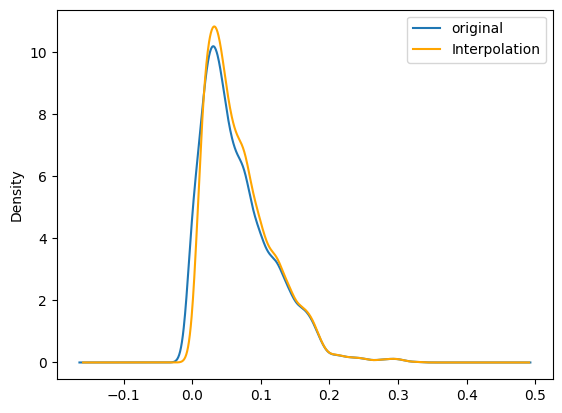

In [23]:
#checking the distribution after and before with interpolation 
data["Item_Visibility"].plot(kind="kde", label = "original")

data["Item_Visibility_interpolate"].plot(kind="kde", color="orange", label="Interpolation")


plt.legend()
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_12548\476639749.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Item_Weight"])


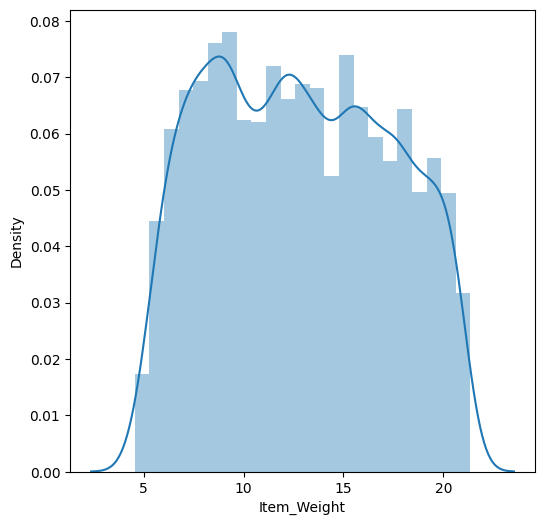

In [24]:
plt.figure(figsize =(6,6))
sns.distplot(data["Item_Weight"])
plt.show()

<Figure size 600x600 with 0 Axes>

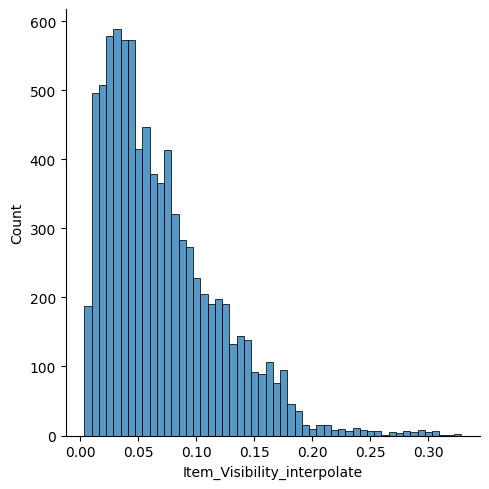

In [25]:
plt.figure(figsize =(6,6))
sns.displot(data["Item_Visibility_interpolate"])
plt.show()

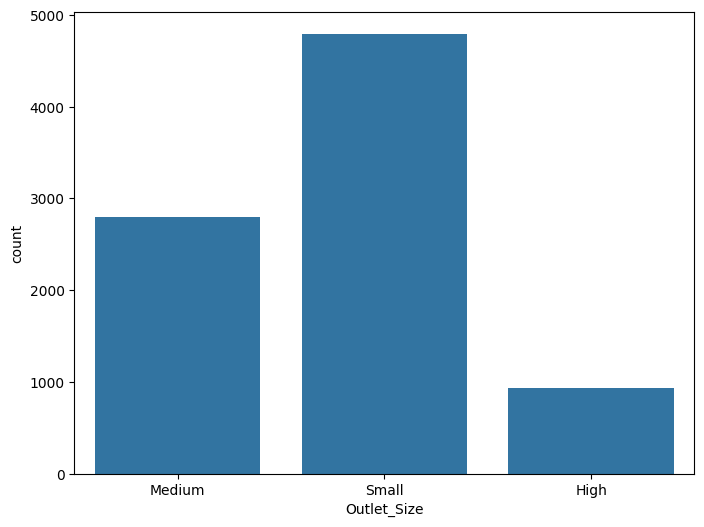

In [26]:
plt.figure(figsize=(8,6))
sns.countplot(data= data, x="Outlet_Size")
plt.show()

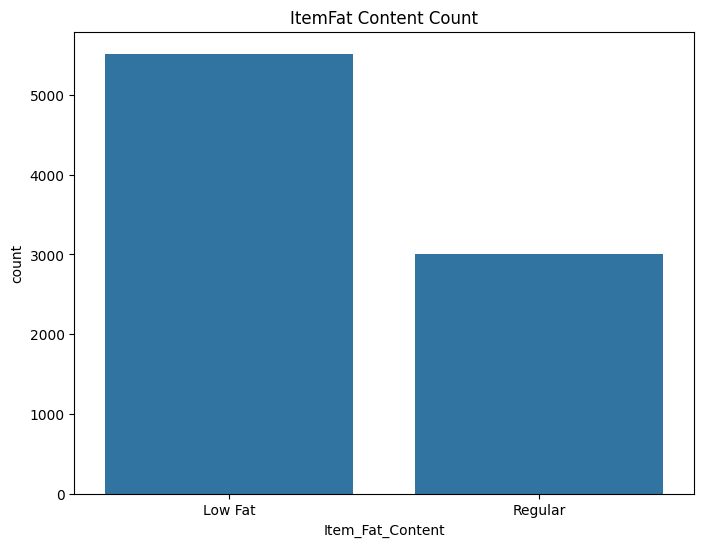

In [27]:
plt.figure(figsize=(8,6))
sns.countplot(data= data, x="Item_Fat_Content")
plt.title("ItemFat Content Count")
plt.show()